In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import sys


In [86]:
pd.set_option('display.max_colwidth', None)  # 전체 열 너비를 무제한으로 설

# 현재 경로
print(os.getcwd())

# id,title,content,likes,url,author,views,created_at,updated_at,조회수
df_post = pd.read_csv("../data/코나 화재/naver_cafe_posts.csv")
df_comment = pd.read_csv("../data/코나 화재/naver_cafe_comments.csv")


/Users/admin/Desktop/teamproject/softeer-team-project/EDA/wh/comment_difference_EDA


In [87]:
df_post.head()


,id,title,content,likes,url,author,views,created_at,updated_at
0,1129062,전기차 화재,[뉴스토리] 전기차 화재의 비밀출처 : 네이버TVhttps://naver.me/FAQchhid,1.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1129062&referrerAllArticles=true,둥이아부지I봉고I광주,791,2023-01-28 17:18:00,NaN
1,1128856,전기차 화재의 37% 주차장에서 발생,https://youtu.be/Bmw4b-RADQg꽤 높은데 무산 통계길래 저리 높을까요,1.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1128856&referrerAllArticles=true,강남VIP l GV60 l서울,966,2023-01-28 09:56:00,NaN
2,1128853,전기차 화재관련 질문.,"저희 아파트가 주차장이 엄청 널널해서 지하 2층에 전기차 충전자리가 20대가 넘어요....300세대인데...그래서 전기차 구입을 고민하는데다만 저는 걱정인게 전기차 충전중 화재가 났을경우 책임소재가 개인에게 전부다 있나요? 제조사는 책임없고..?이게 만에 하나라는게 있어서 일반 차면 주차해놨을때는 걱정없는데 화재가 났을때 걱정이 좀 되네요..대물 최대로 가입할 생각이긴하지만 아파트에 고가차가 너무 많아서....마이바흐, amg gt 이런놈들이 있어서 걱정이네요..",0.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1128853&referrerAllArticles=true,아르구스l무l광주,239,2023-01-28 09:48:00,NaN
3,1128378,중고차 가격이 2년전으로 돌아온 느낌이네요.,피크 찍고다시 2년전 가격으로 돌아온 느낌이네요.그땐 좀 싸다 수출 업체들이 싹쓸이 해가고 고유가에 반도체부족에 이슈들이 많았었는데이제 2년전 가격이고사실 2년더 지난만큼 더 떨어져야 정상 수준아닌가 싶긴하네요.암튼 이제 정상? 으로 얼추 진입 하고 있는 느낌입니다.기변하고 싶어도 고금리에 쉽진 않네요,0.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1128378&referrerAllArticles=true,크리스l모SYl경기,864,2023-01-27 13:41:00,NaN
4,1126496,아이오닉 일레트릭 구입하려고합니다,아이오닉 일레트릭 구입하려고합니다요즘 급발진 이야기가 많던대 이아이노기 일레트릭은 괞찬은가요?? 전기차 처음이라 고민이 많네요 ㅎㅎ; ㅎㅎ,0.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1126496&referrerAllArticles=true,경기ll웅이2,176,2023-01-24 18:53:00,NaN


In [88]:
# 데이터 타입 확인
df_post.dtypes

id              int64
title          object
content        object
likes         float64
url            object
author         object
views          object
created_at     object
updated_at    float64
dtype: object

In [89]:
# id,title,content,likes,url,author,views,created_at,updated_at,조회수
# views -> int64, created_at -> datetime64[ns], updated_at -> datetime64[ns]
def convert_10000(value : str):
    value = value.replace(',', '')
    
    if '만' in value:
        return float(value.replace('만', '')) * 10000
    return int(value)

df_post['views'] = df_post['views'].apply(convert_10000)


In [90]:
# created_at, updated_at -> datetime64[ns]
df_post['created_at'] = pd.to_datetime(df_post['created_at'])
df_post['updated_at'] = pd.to_datetime(df_post['updated_at'])

In [91]:
# post_id,cmt_content,cmt_author,cmt_created_at
df_comment['cmt_created_at'] = pd.to_datetime(df_comment['cmt_created_at'])

df_comment.dtypes

post_id                    int64
cmt_content               object
cmt_author                object
cmt_created_at    datetime64[ns]
dtype: object

In [92]:
# 먼저 df_comment에서 post_id별로 댓글 수를 집계합니다.
comment_count = df_comment.groupby('post_id').size().reset_index(name='comment_count')

# df_filtered에 comment_count를 병합합니다.
df_filtered = pd.merge(df_post, comment_count, left_on='id', right_on='post_id', how='left')

# comment_count가 없는 경우 NaN이 될 수 있으므로, 이를 0으로 대체합니다.
df_filtered['comment_count'] = df_filtered['comment_count'].fillna(0).astype(int)



In [93]:
df_filtered.head()

,id,title,content,likes,url,author,views,created_at,updated_at,post_id,comment_count
0,1129062,전기차 화재,[뉴스토리] 전기차 화재의 비밀출처 : 네이버TVhttps://naver.me/FAQchhid,1.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1129062&referrerAllArticles=true,둥이아부지I봉고I광주,791.0,2023-01-28 17:18:00,NaT,1129062.0,11
1,1128856,전기차 화재의 37% 주차장에서 발생,https://youtu.be/Bmw4b-RADQg꽤 높은데 무산 통계길래 저리 높을까요,1.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1128856&referrerAllArticles=true,강남VIP l GV60 l서울,966.0,2023-01-28 09:56:00,NaT,1128856.0,8
2,1128853,전기차 화재관련 질문.,"저희 아파트가 주차장이 엄청 널널해서 지하 2층에 전기차 충전자리가 20대가 넘어요....300세대인데...그래서 전기차 구입을 고민하는데다만 저는 걱정인게 전기차 충전중 화재가 났을경우 책임소재가 개인에게 전부다 있나요? 제조사는 책임없고..?이게 만에 하나라는게 있어서 일반 차면 주차해놨을때는 걱정없는데 화재가 났을때 걱정이 좀 되네요..대물 최대로 가입할 생각이긴하지만 아파트에 고가차가 너무 많아서....마이바흐, amg gt 이런놈들이 있어서 걱정이네요..",0.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1128853&referrerAllArticles=true,아르구스l무l광주,239.0,2023-01-28 09:48:00,NaT,1128853.0,3
3,1128378,중고차 가격이 2년전으로 돌아온 느낌이네요.,피크 찍고다시 2년전 가격으로 돌아온 느낌이네요.그땐 좀 싸다 수출 업체들이 싹쓸이 해가고 고유가에 반도체부족에 이슈들이 많았었는데이제 2년전 가격이고사실 2년더 지난만큼 더 떨어져야 정상 수준아닌가 싶긴하네요.암튼 이제 정상? 으로 얼추 진입 하고 있는 느낌입니다.기변하고 싶어도 고금리에 쉽진 않네요,0.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1128378&referrerAllArticles=true,크리스l모SYl경기,864.0,2023-01-27 13:41:00,NaT,1128378.0,14
4,1126496,아이오닉 일레트릭 구입하려고합니다,아이오닉 일레트릭 구입하려고합니다요즘 급발진 이야기가 많던대 이아이노기 일레트릭은 괞찬은가요?? 전기차 처음이라 고민이 많네요 ㅎㅎ; ㅎㅎ,0.0,https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1126496&referrerAllArticles=true,경기ll웅이2,176.0,2023-01-24 18:53:00,NaT,1126496.0,6


In [94]:
df_filtered.dtypes

id                        int64
title                    object
content                  object
likes                   float64
url                      object
author                   object
views                   float64
created_at       datetime64[ns]
updated_at       datetime64[ns]
post_id                 float64
comment_count             int64
dtype: object

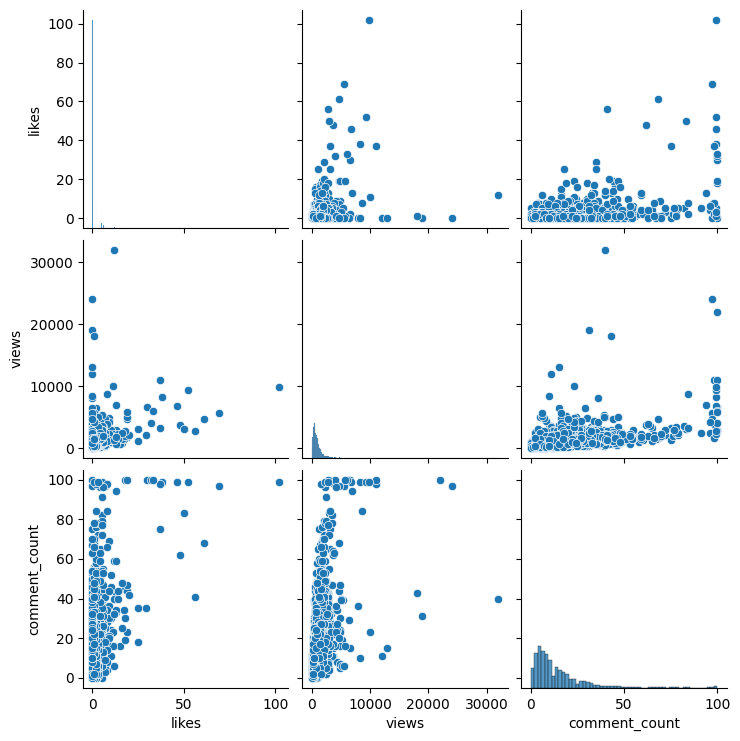

In [95]:
# likes, views, comment_count 상관관계 시각화
sns.pairplot(df_filtered[['likes', 'views', 'comment_count']])

In [96]:
# 상관 계수
df_filtered[['likes', 'views', 'comment_count']].corr()

,likes,views,comment_count
likes,1.000000,0.363189,0.463965
views,0.363189,1.000000,0.499834
comment_count,0.463965,0.499834,1.000000


In [97]:
# lieks, views, comment_count describe 95%, 97%, 99% 분위수 포함
df_filtered[['likes', 'views', 'comment_count']].describe(percentiles=[.90, .95, .97, .99])


,likes,views,comment_count
count,2659.000000,2666.000000,2666.000000
mean,1.271155,1009.453488,14.439610
std,4.386410,1404.645895,14.984279
min,0.000000,13.000000,0.000000
50%,0.000000,706.000000,10.000000
90%,3.000000,1883.500000,30.500000
95%,5.000000,2637.750000,41.000000
97%,7.000000,3182.100000,51.000000
99%,16.420000,5248.850000,84.000000
max,102.000000,32000.000000,100.000000


In [98]:
num_post = 10

# post_id_list, comment_count 가 높은 상위 10개의 post_id를 추출하여 list로 저장
post_id_list = df_filtered.nlargest(num_post, 'comment_count')['id'].tolist()


def get_comment(post_id, df_comment):
    comments = df_comment[df_comment['post_id'] == post_id]
    return comments


In [99]:
import plotly.express as px
import plotly.graph_objects as go

for i in range(num_post):
    comments = get_comment(post_id_list[i], df_comment)
 
    # 1. cmt_created_at을 datetime 형식으로 변환
    comments['cmt_created_at'] = pd.to_datetime(comments['cmt_created_at'])

    # 2. 10분 간격으로 시간 그룹화 (min 사용)
    comments.set_index('cmt_created_at', inplace=True)
    comments = comments.resample('10min').size().cumsum()

    # 3. 누적 댓글 수 계산
    comments = comments.reset_index()

    # 4. plotly로 그래프 그리기
    fig = px.line(comments, x='cmt_created_at', y=0, markers=True,
                labels={'cmt_created_at': 'Time', '0': 'Cumulative Comments'},
                title='Cumulative Comments Over Time')

    fig.show()

    # 그림 저장하기
    url = df_post[df_post['id'] == post_id_list[i]]['url']
    print(url)
    print(type(url))  # Series
    # url 뒤에 ... 안나오게 출력
    print(url.to_string(index=False))

/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



81    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1094067&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1094067&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



688    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=24&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513770&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=24&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513770&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



811    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=17&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=518362&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=17&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=518362&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



878    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=29&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=501858&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=29&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=501858&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1671    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=3&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2023-07-312024-01-31&media=0&sortBy=date&articleid=1267502&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=3&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2023-07-312024-01-31&media=0&sortBy=date&articleid=1267502&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1713    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2023-07-312024-01-31&media=0&sortBy=date&articleid=1298021&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2023-07-312024-01-31&media=0&sortBy=date&articleid=1298021&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1809    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=5&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2021-01-312021-07-31&media=0&sortBy=date&articleid=599727&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=5&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2021-01-312021-07-31&media=0&sortBy=date&articleid=599727&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1962    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2021-01-312021-07-31&media=0&sortBy=date&articleid=635927&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2021-01-312021-07-31&media=0&sortBy=date&articleid=635927&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



13    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1119690&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1119690&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/2184790373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



495    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=21&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=515470&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=21&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=515470&referrerAllArticles=true


In [100]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# 3x3 서브플롯 생성
fig = make_subplots(rows=3, cols=3, 
                    subplot_titles=[f'Post {i+1}' for i in range(9)],
                    shared_xaxes=False, shared_yaxes=False)

for i in range(9):
    # 댓글 데이터 가져오기
    comments = get_comment(post_id_list[i], df_comment)

    # 1. cmt_created_at을 datetime 형식으로 변환
    comments['cmt_created_at'] = pd.to_datetime(comments['cmt_created_at'])

    # 2. 10분 간격으로 시간 그룹화 (min 사용)
    comments.set_index('cmt_created_at', inplace=True)
    comments = comments.resample('10min').size().cumsum()

    # 3. 누적 댓글 수 계산
    comments = comments.reset_index()

    # 행과 열 계산 (3x3 그리드)
    row = i // 3 + 1
    col = i % 3 + 1

    # 4. plotly로 그래프 추가
    fig.add_trace(
        go.Scatter(x=comments['cmt_created_at'], y=comments[0], mode='lines+markers', name=f'Post {i+1}'),
        row=row, col=col
    )

# 레이아웃 업데이트
fig.update_layout(height=1000, width=1000, title_text="Cumulative Comments Over Time for Multiple Posts",
                  showlegend=False)

# 그래프 보여주기
fig.show()


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/4057359539.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/4057359539.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/4057359539.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

# COMMENT Difference_EDA
## Comment의 개수가 50개 이상인 게시글에 대해서 분석

* comment_count가 50개 이상인 게시글은 전체 2666개의 게시글 중 상위 3%(81개)
* 이 게시글들의 댓글을 시간에 따라 나열하여 분석
* 댓글이 50개 이상인 게시글들의 댓글을 5분 시간 간격으로

In [101]:
df_filtered.describe()

,id,likes,views,created_at,updated_at,post_id,comment_count
count,2.666000e+03,2659.000000,2666.000000,2666,0,2.613000e+03,2666.000000
mean,7.670621e+05,1.271155,1009.453488,2021-10-12 22:34:44.313578496,NaT,7.674734e+05,14.439610
min,3.453050e+05,0.000000,13.000000,2019-07-27 08:39:00,NaT,3.453050e+05,0.000000
25%,5.191820e+05,0.000000,414.250000,2020-10-17 17:16:45,NaT,5.192410e+05,5.000000
50%,5.657965e+05,0.000000,706.000000,2021-02-16 00:07:00,NaT,5.659630e+05,10.000000
75%,1.034246e+06,1.000000,1175.750000,2022-10-11 01:26:30,NaT,1.032165e+06,18.000000
max,1.537420e+06,102.000000,32000.000000,2024-08-12 19:37:00,NaT,1.537241e+06,100.000000
std,3.651877e+05,4.386410,1404.645895,NaN,NaN,3.653243e+05,14.984279


In [102]:
# comment_count 가 50인 경우는 상위 몇 %에 해당하는지 계산
comment_count = 50
total = df_filtered['comment_count'].count()
percentile = (total - df_filtered[df_filtered['comment_count'] > comment_count]['comment_count'].count()) / total * 100
percentile

np.float64(96.96174043510878)

## 게시글의 댓글의 개수를 5분 간격으로 누적시겨 카운팅

In [103]:

def get_post_id_list_by_comment_count(df_filtered : pd.DataFrame, comment_count):
    # comment_count 변수의 값보다 comment_count가 큰 post_id를 추출하여 list로 저장, comment_count가 큰 순서대로 정렬
    post_id_list = df_filtered[df_filtered['comment_count'] > comment_count].sort_values('comment_count', ascending=False)['id'].tolist()
    
    return post_id_list

post_id_list = get_post_id_list_by_comment_count(df_filtered, 50)

print(len(post_id_list))

df_commulate_num = pd.DataFrame(columns=['post_id', 'time_interval', 'count', 'cumulative_num'])

for i in range(len(post_id_list)):
    # for check
    # if i == 1:
    #     break
    
    # post_id,cmt_content,cmt_author,cmt_created_at
    comments = get_comment(post_id_list[i], df_comment)
    
    # cmt_created_at을 datetime으로 변환
    comments['cmt_created_at'] = pd.to_datetime(comments['cmt_created_at'])
    comments = comments.sort_values('cmt_created_at')

    # 시간순으로 정렬
    comments = comments.sort_values('cmt_created_at')

    # 첫 댓글이 달린 시간을 기준으로 5분 단위로 분리하기
    comments['time_elapsed'] = (comments['cmt_created_at'] - comments['cmt_created_at'].iloc[0]).dt.total_seconds() // 60
    
    # 5분 간격으로 time_elapsed의 범위를 생성
    min_interval = comments['time_elapsed'].min() // 5 * 5
    max_interval = (comments['time_elapsed'].max() // 5 + 1) * 5
    time_range = pd.DataFrame({'time_interval': range(int(min_interval), int(max_interval) + 1, 5)})

    # 각 5분 단위의 댓글 수 집계
    comments['time_interval'] = (comments['time_elapsed'] // 5) * 5
    count_per_interval = comments.groupby('time_interval').size().reset_index(name='count')

    # 5분 단위의 time_range에 댓글 수를 병합
    full_interval_df = pd.merge(time_range, count_per_interval, on='time_interval', how='left')
    full_interval_df['count'] = full_interval_df['count'].fillna(0).astype(int)

    # 누적 댓글 수 계산
    full_interval_df['cumulative_num'] = full_interval_df['count'].cumsum()
    
    # full_interval_df에 post_id를 추가
    full_interval_df['post_id'] = int(post_id_list[i])
    
    # df_commulate_num에 full_interval_df를 추가
    df_commulate_num = pd.concat([df_commulate_num, full_interval_df], ignore_index=True)
    


    
    
    
    

81


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/3863966754.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/3863966754.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_57548/3863966754.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [104]:
df_commulate_num.head(20)

,post_id,time_interval,count,cumulative_num
0,599727,0,4,4
1,599727,5,1,5
2,599727,10,3,8
3,599727,15,2,10
4,599727,20,3,13
5,599727,25,1,14
6,599727,30,3,17
7,599727,35,2,19
8,599727,40,5,24
9,599727,45,1,25


In [105]:
# df_commulate_num의 모든 타입을 int로 변환 
df_commulate_num = df_commulate_num.astype(int)

In [106]:
df_commulate_num.describe()

,post_id,time_interval,count,cumulative_num
count,7.550560e+05,7.550560e+05,755056.000000,755056.000000
mean,8.173785e+05,3.505961e+05,0.007993,63.716597
std,3.365415e+05,4.063410e+05,0.152348,12.664660
min,5.018580e+05,0.000000e+00,0.000000,1.000000
25%,5.690110e+05,3.266500e+04,0.000000,53.000000
50%,5.711930e+05,1.788500e+05,0.000000,64.000000
75%,1.197462e+06,5.230800e+05,0.000000,66.000000
max,1.533858e+06,1.448145e+06,16.000000,100.000000


In [107]:
df_commulate_num.dtypes

post_id           int64
time_interval     int64
count             int64
cumulative_num    int64
dtype: object

## 댓글이 50개 이상인 게시글들의 댓글이 50개가 쌓일 때 까지의 과정을 분석하기 위해, 누적 댓글이 50개 이상인 구간을 제외

In [108]:
# cumulate_num이 50 초과인 행 모두 제거
df_commulate_num = df_commulate_num[df_commulate_num['cumulative_num'] <= 50]

In [109]:
df_commulate_num.describe()

,post_id,time_interval,count,cumulative_num
count,8.823700e+04,88237.000000,88237.000000,88237.000000
mean,8.496712e+05,42176.731077,0.045310,46.462096
std,3.484664e+05,39891.072004,0.394193,7.757085
min,5.018580e+05,0.000000,0.000000,1.000000
25%,5.711930e+05,7440.000000,0.000000,47.000000
50%,5.711930e+05,27165.000000,0.000000,50.000000
75%,1.197462e+06,73410.000000,0.000000,50.000000
max,1.533858e+06,139340.000000,16.000000,50.000000


In [110]:
# time_interval이 0인 행들만 추출
df_commulate_num[df_commulate_num['time_interval'] == 0].describe()


,post_id,time_interval,count,cumulative_num
count,8.100000e+01,81.0,81.000000,81.000000
mean,9.382367e+05,0.0,4.000000,4.000000
std,4.080383e+05,0.0,2.743173,2.743173
min,5.018580e+05,0.0,1.000000,1.000000
25%,5.602670e+05,0.0,2.000000,2.000000
50%,7.427850e+05,0.0,3.000000,3.000000
75%,1.331941e+06,0.0,5.000000,5.000000
max,1.533858e+06,0.0,16.000000,16.000000


## 6시간(360분)동안 '5분' 시간 간격으로 그래프를 생성
### 시간 구간별로 누적 댓글수가 x 개인 게시글이 y개 있음을 나타내는 히스토그램

### 시간이 흐를수록 누적 댓글수가 많은 게시글의 수가 많아짐

In [111]:
# 부하가 심함
# for i in range(0, 360, 5):
#     fig = px.histogram(df_commulate_num[df_commulate_num['time_interval'] == i], x='cumulative_num', color='post_id', marginal='box')
#     fig.update_layout(title=f'Cumulative Comments Over Time (time_interval = {i})')
#     fig.show()


# 위 히스토그램을 바탕으로 확률 밀도 함수로 표현
* 각 구간별 90%의 게시글들은 x개 이상의 누적 댓글 수를 가지고 있음

In [112]:
from scipy import stats

# 5분 간격에 대해 정규 분포 그래프 그리기
for i in range(0, 360, 5):
    # 현재 5분 간격의 데이터 필터링
    _df_filtered = df_commulate_num[df_commulate_num['time_interval'] == i]
    
    if _df_filtered.empty:
        continue
    
    # 정규 분포 추정
    mean = _df_filtered['cumulative_num'].mean()
    std = _df_filtered['cumulative_num'].std()
    
    # x축 값 생성 (정규 분포의 범위 설정)
    x = np.linspace(_df_filtered['cumulative_num'].min() - 1, _df_filtered['cumulative_num'].max() + 1, 100)
    y = stats.norm.pdf(x, mean, std)
    
    # 상위 80% 지점 계산
    upper_80_percentile = stats.norm.ppf(0.20, mean, std)
    
    
    # Plotly 그래프 생성
    fig = go.Figure()
    
    # 정규 분포 곡선 추가
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines',
        name='Normal Distribution'
    ))

    # 데이터 분포 히스토그램 추가
    fig.add_trace(go.Histogram(
        x=_df_filtered['cumulative_num'],
        histnorm='probability density',
        name='Data Histogram',
        opacity=0.6
    ))

    # 상위 90% 지점 표시
    fig.add_trace(go.Scatter(
        x=[upper_80_percentile],
        y=[stats.norm.pdf(upper_80_percentile, mean, std)],
        mode='markers',
        marker=dict(size=10, color='red', symbol='x'),
        name='90th Percentile'
    ))

    # 레이아웃 설정
    fig.update_layout(
        title=f'Normal Distribution vs Cumulative Comments (time_interval = {i})',
        xaxis_title='Cumulative Number of Comments',
        yaxis_title='Probability Density',
        barmode='overlay',
        template='plotly_dark'
    )
    
    # 그래프 표시
    fig.show()

In [114]:
# title, content, url, author, updated_at drop
df_filtered.drop(['title', 'content', 'url', 'author', 'updated_at', 'post_id'], axis=1, inplace=True)
df_filtered.head()

,id,likes,views,created_at,comment_count
0,1129062,1.0,791.0,2023-01-28 17:18:00,11
1,1128856,1.0,966.0,2023-01-28 09:56:00,8
2,1128853,0.0,239.0,2023-01-28 09:48:00,3
3,1128378,0.0,864.0,2023-01-27 13:41:00,14
4,1126496,0.0,176.0,2023-01-24 18:53:00,6


In [115]:
# post_id 가 599727인 경우의 댓글을가져옵니다.
df_filtered[df_filtered['id'] == 599727]

,id,likes,views,created_at,comment_count
1809,599727,18.0,2819.0,2021-04-19 16:32:00,100


post_id	time_interval	count	cumulative_num
0	599727	0	4	4
1	599727	5	1	5
2	599727	10	3	8
3	599727	15	2	10
4	599727	20	3	13
5	599727	25	1	14
6	599727	30	3	17ㅔ
7	599727	35	2	19
8	599727	40	5	24
9	599727	45	1	25
10	599727	50	4	29
11	599727	55	5	34
12	599727	60	3	37
13	599727	65	4	41
14	599727	70	2	43
15	599727	75	0	43
16	599727	80	0	43
17	599727	85	0	43
18	599727	90	0	43
19	599727	95	1	44